In [7]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

In [36]:
mycore = 2
desiredslice=6
data = pickle.load(open('core'+str(mycore)+'ToSlice'+str(desiredslice)+'.pkl', 'rb'))

In [37]:
targets = []
inputs = []
threshold = 120
for i in range(1,len(data)):
    bit, trace = data[i]
    if data[i-1][0] == 0:
        continue
    if len(trace) >= threshold:
        targets.append(bit)
        inputs.append(list(trace[:threshold]))
    elif len(trace) >= threshold//2 and i < len(data)-1 and len(data[i+1][1]) + len(trace) >= threshold:
        targets.append(bit)
        inputs.append(list(trace) + list(data[i+1][1][:threshold-len(trace)]))
target_arr = np.array(targets)
input_arr = np.array(inputs)
print(len(input_arr))

170


In [38]:
def moving_avg(arr, window=3):
    arr2 = np.zeros_like(arr).astype(np.float32)
    for i in range(0,window-1):
        arr2[i] = arr[:i+1].mean()
    for i in range(window-1,len(arr)):
        arr2[i] = arr[i-window+1:i+1].mean()
    return arr2
moving_avg(input_arr[1],5)
#input_arr
    

array([40.      , 43.      , 43.333332, 42.      , 42.      , 43.6     ,
       42.      , 42.      , 42.8     , 42.8     , 40.8     , 41.2     ,
       40.8     , 40.8     , 40.      , 40.8     , 41.2     , 42.4     ,
       42.      , 42.4     , 42.8     , 43.2     , 41.6     , 41.6     ,
       41.6     , 40.8     , 40.4     , 40.      , 40.4     , 40.8     ,
       41.2     , 41.6     , 42.4     , 42.4     , 42.4     , 42.8     ,
       42.4     , 42.4     , 42.4     , 42.4     , 42.      , 41.2     ,
       40.8     , 41.2     , 41.2     , 41.2     , 41.6     , 42.      ,
       41.6     , 41.6     , 41.6     , 41.6     , 41.6     , 42.      ,
       42.      , 42.4     , 43.2     , 42.8     , 41.2     , 41.2     ,
       41.2     , 40.4     , 40.4     , 42.      , 42.      , 41.6     ,
       41.6     , 42.      , 42.4     , 42.      , 41.6     , 42.      ,
       42.      , 40.8     , 40.8     , 41.2     , 42.      , 41.6     ,
       42.4     , 42.4     , 42.4     , 41.6     , 

41.71666666666667
41.36666666666667
41.4
41.666666666666664
41.483333333333334
41.45
41.56666666666667
41.75
41.71666666666667


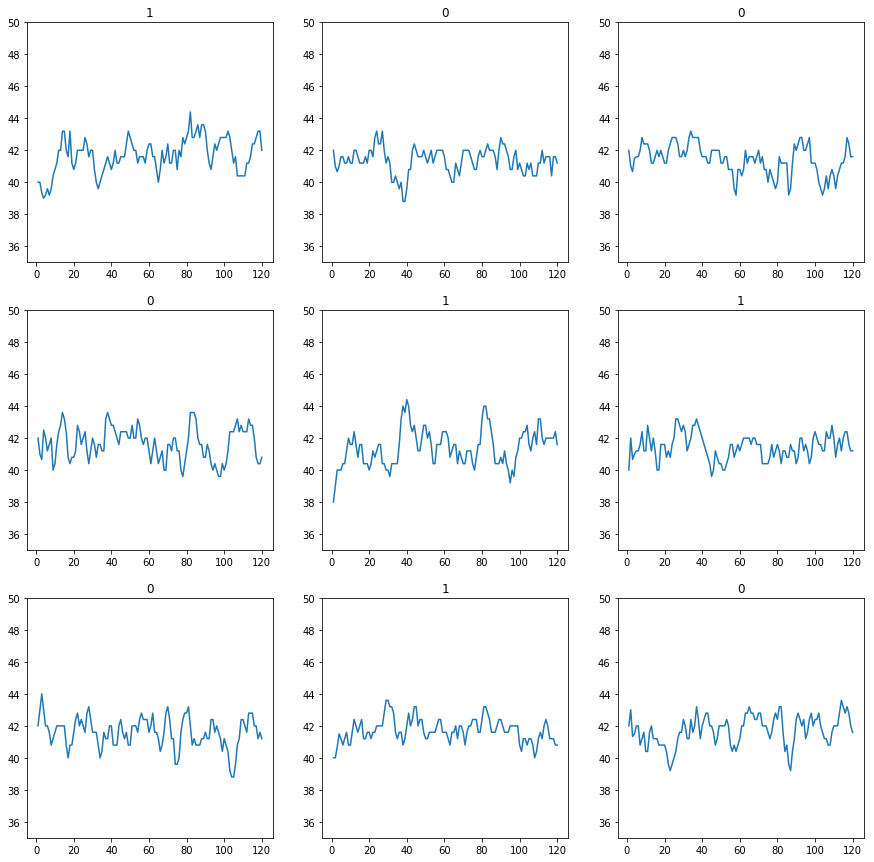

In [39]:

fig = plt.figure(figsize=(15,15))
seed = np.random.randint(len(targets)-10)
for idx in range(1,10):
    rn = seed + idx
    ax1 = fig.add_subplot(3,3,idx)
    ax1.set_title(str(targets[rn]))
    xaxis = np.arange(1,threshold+1)
    yaxis = moving_avg(input_arr[rn],5)
    #yaxis = input_arr[rn]
    print(input_arr[rn].mean())
    ax1.plot(xaxis,yaxis)
    axes = plt.gca()
    axes.set_ylim([35,50])
fig.show()

In [28]:
input_arr[:10]

array([[40, 46, 42, ..., 40, 42, 42],
       [40, 46, 44, ..., 42, 46, 42],
       [44, 38, 44, ..., 42, 46, 42],
       ...,
       [44, 44, 40, ..., 42, 48, 38],
       [40, 44, 40, ..., 42, 42, 46],
       [46, 40, 44, ..., 44, 36, 42]])

In [60]:
b, t = data[10]
print(b)

0


In [12]:
lens = [len(d[1]) for d in data]

In [13]:
lens

[117,
 46,
 72,
 129,
 87,
 54,
 145,
 93,
 39,
 21,
 19,
 58,
 137,
 86,
 75,
 0,
 132,
 97,
 54,
 61,
 138,
 43,
 57,
 88,
 37,
 21,
 21,
 52,
 110,
 99,
 52,
 77,
 54,
 102,
 79,
 27,
 54,
 85,
 41,
 50,
 127,
 78,
 83,
 37,
 38,
 81,
 38,
 18,
 10,
 21,
 48,
 84,
 21,
 21,
 55,
 140,
 146,
 80,
 36,
 131,
 137,
 108,
 78,
 53,
 137,
 134,
 111,
 85,
 20,
 21,
 20,
 21,
 53,
 76,
 21,
 82,
 12,
 137,
 139,
 98,
 54,
 135,
 86,
 80,
 48,
 57,
 136,
 134,
 86,
 77,
 130,
 113,
 98,
 22,
 54,
 84,
 21,
 22,
 19,
 55,
 135,
 79,
 53,
 151,
 136,
 138,
 118,
 94,
 102,
 128,
 137,
 78,
 29,
 79,
 54,
 140,
 131,
 126,
 92,
 154,
 78,
 81,
 120,
 127,
 125,
 64,
 24,
 54,
 77,
 0,
 0,
 138,
 86,
 22,
 53,
 87,
 55,
 133,
 92,
 123,
 147,
 147,
 37,
 74,
 87,
 55,
 143,
 128,
 140,
 89,
 83,
 39,
 76,
 56,
 150,
 59,
 75,
 84,
 62,
 126,
 52,
 71,
 139,
 131,
 73,
 58,
 84,
 37,
 9,
 137,
 86,
 13,
 40,
 123,
 140,
 83,
 38,
 23,
 21,
 22,
 20,
 52,
 93,
 72,
 125,
 63,
 23,
 53,
 110,
 14